In [2]:
# 분류 성능평가
# Reference: https://datascienceschool.net/view-notebook/731e0d2ef52c41c686ba53dcaf346f32/

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from matplotlib import rc
import warnings
warnings.filterwarnings(action="ignore")
rc('font', family="AppleGothic")
%matplotlib inline

### 분류 결과표(Confusion Matrix)
# row: original class
# column: predicted class
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
cnf_matrix = confusion_matrix(y_true, y_pred)
cnf_matrix

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

Confusion matrix w/o normalization
[[2 0 0]
 [0 0 1]
 [1 0 2]]


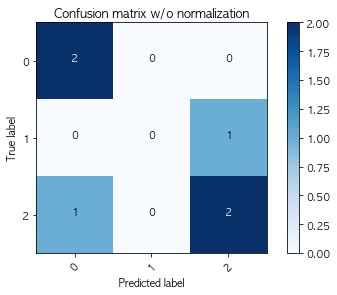

In [5]:
# plot defined in kaggle article of Titanic data
# Reference: https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy
import itertools
def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = "Normalized confusion matrix"
        #print("Normalized confusion matrix")
    else:
        title = "Confusion matrix w/o normalization"
        #print("Confusion matrix w/o normalization")
    print(title)
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names=['0','1','2']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names)

In [6]:
### 이진분류결과표(Binary Confusion Matrix)
#            양성이라고 예측       |  음성이라고 예측
# 실제 양성 |  True positive(TP)    False negative(FN)
# 실제 음성 |  False positive(FP)   True negative()
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]
confusion_matrix(y_true, y_pred)

array([[2, 0],
       [1, 3]])

In [8]:
confusion_matrix(y_true, y_pred, labels=[1, 0]) #index ordering

array([[3, 1],
       [0, 2]])

In [9]:
### 평가점수(Score)
# 정확도, Accuray = (TP+TN)/(TP+TN+FP+FN): 전체 샘플 중 맞게 예측한 샘플의 비율
# 정밀도, Precision = (TP)/(TP+FP): 양성 클래스 중 실제로 양성 클래스에 속하는 샘플의 비율
# 재현율, Recall = (TP)/(TP+FN): 실제 양성 클래스에 속한 표본 중에 양성 클래스에 속한다고 출력한 표본의 비율
# 위양성율, Fallout = (FP)/(FP+TN): 실제 양성 클래스에 속하지 않는 표본 중에 양성 클래스에 속한다고 출력한 표본의 비율
# F1 score = 2*precision*recall/(precision+recall)
from sklearn.metrics import classification_report
y_true = [0, 0, 0, 1, 1, 0, 0]
y_pred = [0, 0, 0, 0, 1, 1, 1]
print(classification_report(y_true, y_pred, target_names=['class 0','class 1']))


              precision    recall  f1-score   support

     class 0       0.75      0.60      0.67         5
     class 1       0.33      0.50      0.40         2

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



In [10]:
y_true = [0, 0, 1, 1, 2, 2, 2]
y_pred = [0, 0, 1, 2, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00         2
     class 1       0.50      0.50      0.50         2
     class 2       0.67      0.67      0.67         3

    accuracy                           0.71         7
   macro avg       0.72      0.72      0.72         7
weighted avg       0.71      0.71      0.71         7



In [14]:
### ROC 커브
# : 클래스 판별 기준값의 변화에 따른 fallout과 recall의 변화를 시각화
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
X, y = make_classification(n_samples=16, n_features=2, n_informative=2, 
                           n_redundant=0, random_state=0)
model = LogisticRegression().fit(X, y)
y_hat = model.predict(X)
f_value = model.decision_function(X)

df = pd.DataFrame(np.vstack([f_value, y_hat, y]).T, columns=["f", "y_hat", "y"])
df.sort_values("f", ascending=False).reset_index(drop=True)

# threshold = 0

,f,y_hat,y
0,2.167628,1.0,1.0
1,1.861485,1.0,1.0
2,1.482220,1.0,1.0
3,1.447944,1.0,1.0
4,1.432822,1.0,1.0
5,1.035662,1.0,1.0
6,0.244729,1.0,0.0
7,-0.063016,0.0,1.0
8,-0.582239,0.0,0.0
9,-0.878385,0.0,0.0


Confusion matrix w/o normalization
[[6 2]
 [1 7]]


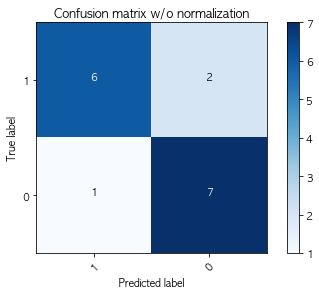

In [15]:
cnf_matrix = confusion_matrix(y, y_hat, labels=[1,0])
plot_confusion_matrix(cnf_matrix,classes=['1','0'])

In [16]:
recall  = 6 / (6+2)
fallout = 1 / (1+7)
print("recall= {}".format(recall))
print("fallout= {}".format(fallout))

recall= 0.75
fallout= 0.125


In [22]:
from sklearn.metrics import roc_curve

# ROC curve using decision function
fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))
df = pd.DataFrame(np.vstack([thresholds, tpr, fpr]).T, 
                  columns=["Threshold", "Recall", "Fallout"])
df

,Threshold,Recall,Fallout
0,3.167628,0.000,0.000
1,2.167628,0.125,0.000
2,1.035662,0.750,0.000
3,0.244729,0.750,0.125
4,-0.063016,0.875,0.125
5,-0.878385,0.875,0.375
6,-1.027759,1.000,0.375
7,-4.148556,1.000,1.000


In [23]:
# ROC curve using prediction probabiliy
fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:,1])
df = pd.DataFrame(np.vstack([thresholds, tpr, fpr]).T, 
                  columns=["Threshold", "Recall", "Fallout"])
df

,Threshold,Recall,Fallout
0,1.897305,0.000,0.000
1,0.897305,0.125,0.000
2,0.738012,0.750,0.000
3,0.560879,0.750,0.125
4,0.484251,0.875,0.125
5,0.293513,0.875,0.375
6,0.263519,1.000,0.375
7,0.015542,1.000,1.000


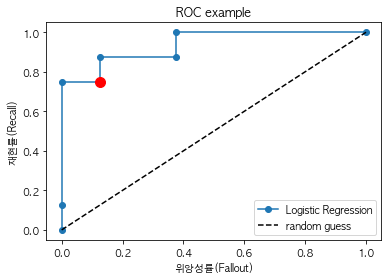

In [25]:
plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0,1], [0,1], 'k--', label='random guess')
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('위양성률(Fallout)')
plt.ylabel('재현률(Recall)')
plt.title('ROC example')
plt.legend()
plt.show()

In [28]:
# scikit-learn packages maximize the model's accuracy
# ROC curve can be different even when two models have same accuracy, precision and recall 
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

X, y = make_classification(n_samples=1000, weights=[0.95, 0.05], random_state=5)

model1 = LogisticRegression().fit(X,y)
y_hat1 = model1.predict(X)

model2 = SVC(gamma=0.0001, C=3000, probability=True).fit(X,y)
y_hat2 = model2.predict(X)

class_names = ['0', '1']

In [29]:
cnf_matrix1 = confusion_matrix(y, y_hat1)
cnf_matrix2 = confusion_matrix(y, y_hat2)

Confusion matrix w/o normalization
[[940   3]
 [ 30  27]]


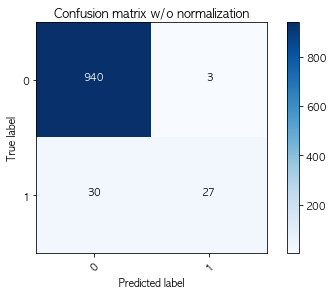

In [30]:
plot_confusion_matrix(cnf_matrix1, classes=class_names)
# Logistic Regression

Confusion matrix w/o normalization
[[940   3]
 [ 30  27]]


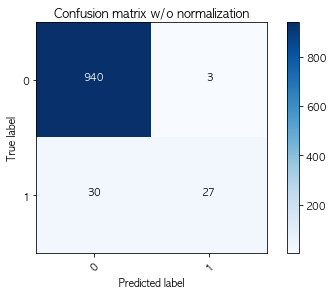

In [31]:
plot_confusion_matrix(cnf_matrix2, classes=class_names)
# Logistic Regression

In [32]:
print(classification_report(y, model1.predict(X)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       943
           1       0.90      0.47      0.62        57

    accuracy                           0.97      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.97      0.97      0.96      1000



In [33]:
print(classification_report(y, model2.predict(X)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       943
           1       0.90      0.47      0.62        57

    accuracy                           0.97      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.97      0.97      0.96      1000



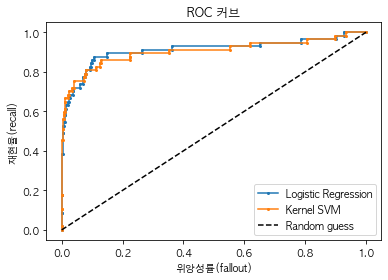

In [34]:
fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds2 = roc_curve(y, model2.decision_function(X))

plt.plot(fpr1, tpr1, 'o-', ms=2, label="Logistic Regression")
plt.plot(fpr2, tpr2, 'o-', ms=2, label="Kernel SVM")
plt.plot([0,1],[0,1],'k--', label="Random guess")
plt.legend()
plt.xlabel("위양성률(fallout)")
plt.ylabel("재현율(recall)")
plt.title("ROC 커브")
plt.show()

In [35]:
### Area Under Curve(AUC)
# 1에 가까운 값이 좋은 모형
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.9112016520622872, 0.9037227214377407)

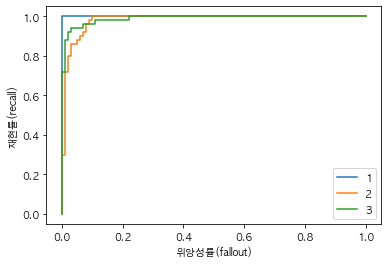

In [38]:
# 다중 클래스의 경우 각각의 One-vs-Rest(OvR) 에 대해  ROC커브를 그림
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize

iris = load_iris()
X = iris.data
y = label_binarize(iris.target, [0,1,2])

fpr = [None]*3
tpr = [None]*3
thr = [None]*3

for i in range(3):
    model = GaussianNB().fit(X,y[:,i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:,i], model.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i], label="{}".format(i+1))
plt.xlabel('위양성률(fallout)')
plt.ylabel('재현률(recall)')
plt.legend()
plt.show()